# Package loading and basic configurations

In [8]:
%load_ext autoreload
%autoreload 2

# Juan Sebastian Garzon Alvarado 
# Westfälische Wilhelms-Universität Münster
# Floating car data analytics & visualization for traffic management and safety
# 2020 SS


# load dependencies'
import pandas as pd
import geopandas as gpd
import folium
import branca
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.embed import file_html
from bokeh.resources import CDN

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [9]:
bbox = BboxSelector([
    7.601165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df.head()

,id,time,geometry,GPS PDOP.value,GPS PDOP.unit,Speed.value,Speed.unit,GPS Altitude.value,GPS Altitude.unit,GPS Bearing.value,...,Consumption.value,Consumption.unit,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5e8b930965b80c5d6b4d7cd1,2020-03-07T12:33:15,POINT (7.64069 51.95733),1.090631,precision,28.999999,km/h,110.381939,m,124.858622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8b930965b80c5d6b4d7cd3,2020-03-07T12:33:20,POINT (7.64118 51.95712),1.000000,precision,28.000000,km/h,108.260375,m,125.020801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8b930965b80c5d6b4d7cd4,2020-03-07T12:33:26,POINT (7.64162 51.95690),1.257198,precision,28.000001,km/h,105.826028,m,121.203960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8b930965b80c5d6b4d7cd5,2020-03-07T12:33:31,POINT (7.64210 51.95672),1.000000,precision,30.000000,km/h,104.395998,m,123.412759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8b930965b80c5d6b4d7cd6,2020-03-07T12:33:36,POINT (7.64264 51.95650),1.026727,precision,31.409419,km/h,101.516865,m,122.170479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


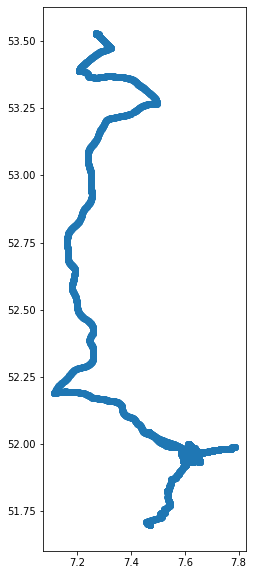

In [10]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

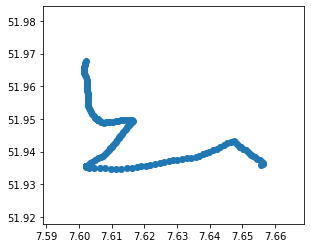

In [11]:
some_track_id = track_df['track.id'].unique()[5]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline. Using the popups the user can access to additional information (Speed value vs time).

In [12]:

#Load spatial informacion

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

# Load speed and time information

x=some_track['time']
y=some_track['Speed.value']
x=[s.replace('T',' ') for s in (x)]
x= pd.Series(x)
x=pd.to_datetime(x)

# create a new plot with figure
chart = figure(x_axis_type="datetime",plot_width=450, plot_height=275, x_axis_label="Time",y_axis_label="km/h")
chart.line(x,y,line_width=2)
chart.title.text = 'Speed information - Track id:'+ str(some_track_id)

html = file_html(chart, CDN, "Speed value")
iframe = branca.element.IFrame(html=html, width=500, height=300)
popup = folium.Popup(iframe)

# Plot map

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)],popup=popup, color='blue').add_to(m)
m

## Experience

On the one hand, I had some problems with the installation of jupyter so I had to re-install anaconda to open the jupyter notebook. Additionally, for the implementation of the popup information I had problems adding the 'bokeh' graphic html into the popup. I used multiple sources of information (e.g bokeh & folium documentation, and stackoverflow) to fix this problem. 
